## Introduction:

 Hello! I used data from the local City of Pittsburgh police to better examine which areas in Pittsburgh would be safer to live in.  My group felt that viewing crimerates across different neighborhoods is vital in choosing the best one because safety is essential to both our well-being and enjoyment within any given neighborhood.  If the neighborhood isn't safe, we aren't allowed to fully enjoy the neighborhood to its full extent.  I use this dataset to find the number of arrests that occur in each zipcode.  I use this number to better determine the areas where crime happens less frequently in hopes that it will aid us in our task of choosing the best neighborhood in Pittsburgh.  

## Link to Arrest-Data Set:

https://data.wprdc.org/dataset/arrest-data

## Looking at the Data:

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
#Importing the arrest data.  Note the information the data information provides.  The Arrest Data is very specfic about the location/nature of arrest but evidently excludes the personal information of the arrested
#persons.  
arrest_pandas = pd.read_csv("ArrestData.csv")

arrest_pandas.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [48]:
#In this cell, I better reorganize the data to infomration that is more relevant to finding out which zipcodes/neighborhoods have the lowest crime.  
#Note: Some of the zipcodes aren't all legitimate zipcodes. Some are other zones/areas of Pittsburgh that do not have zipcodes to accompany them.  For example, 
#all of the zipcodes with "1" are from "Zone 1". I also make a column for zipcodes by pulling the last string in the arrestlocation data.  I lastly sort by those zipcode values in ascending order.  

df = pd.DataFrame(arrest_pandas)
df['ZipCodes'] = df['ARRESTLOCATION'].str.split().str[-1]
df = df.drop(columns = ['INCIDENTLOCATION', 'INCIDENTZONE', 'INCIDENTTRACT', 'COUNCIL_DISTRICT','PUBLIC_WORKS_DIVISION','X', 'Y'])
df = df.sort_values(by = ['ZipCodes'])
df.head(1000)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTNEIGHBORHOOD,ZipCodes
24648,2005806,18188634,18.0,F,W,2018-09-24T21:49:00,Zone 1,2701 Simple Assault. / 2718(a)(1) Strangulatio...,NaN,1
1481,1976306,16179695,26.0,F,B,2016-10-04T22:45:00,Zone 1,2701 Simple Assault. / 2701(b)(2) Simple Assau...,NaN,1
36113,2020459,19220662,56.0,M,W,2019-10-29T09:48:00,Zone 1,3304 Criminal Mischief. / 3127(a) Indecent exp...,NaN,1
36109,2020455,19220436,37.0,M,W,2019-10-29T01:00:00,Zone 1,3304 Criminal Mischief. / 5505 Public Drunkenn...,NaN,1
10117,1987270,17119676,28.0,F,B,2017-06-28T12:56:00,Zone 1,2706 Terroristic Threats. / 2904 Interference ...,NaN,1
...,...,...,...,...,...,...,...,...,...,...
9026,1986010,17099708,23.0,M,W,2017-05-31T18:40:00,4400 Block Stanton AV & McCandless AV Pittsbur...,13(a)(16) Possession of Controlled Substance /...,Stanton Heights,15201
8634,1985484,17091820,37.0,F,W,2017-05-20T00:39:00,"5100 Block Butler ST Pittsburgh, PA 15201","6308(a) Underage Purchase, Consume, Possessed ...",Upper Lawrenceville,15201
40796,2027004,20092068,40.0,M,W,2020-05-18T11:45:00,"200 Block 57th ST Pittsburgh, PA 15201",9093 Indirect Criminal Contempt,Stanton Heights,15201
42099,2028843,20127858,59.0,M,W,2020-07-11T22:53:00,"Woodbine ST & Arcade WY Pittsburgh, PA 15201",3323 Stop Signs and Yield Signs. / 3731 Drivin...,Stanton Heights,15201


In [49]:
#This code cell finds the count of each unique zip code in the dataset.  As shown by the numbers displayed, there is a great range in the counts across the varying zipcodes.  The left column
#signifies zipcode and the right column shows its count.   

zipcodeFrequency = df['ZipCodes']
zipcodeCounts = (zipcodeFrequency).value_counts()
zipcodeCounts = zipcodeCounts.to_frame()
zipcodeCounts.index.name = "Zip_Codes"
zipcodeCounts.columns = ["Counts"]
print(zipcodeCounts)

           Counts
Zip_Codes        
15219       14814
15212        5708
15210        3223
15206        2786
15203        2149
...           ...
15282           1
15252           1
17325           1
15044           1
18801           1

[130 rows x 1 columns]


This first bar graph is just looking at the distribution of the zipcode counts.  It is a pandas bar graph so the representation is not the best but as you can see,
the distribution is very uneven accross the zipcodes.  The counts seem to grow seemingly exponentially as the zipcodes go into more densely populated areas,
which makes sense.  More people = Higher crime rates

<AxesSubplot:ylabel='Zip_Codes'>

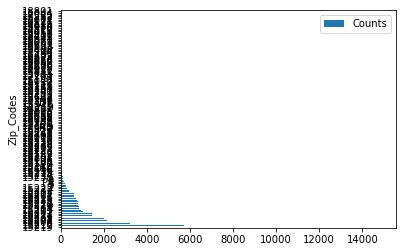

In [50]:
zipcodeCounts.plot.barh(rot = 0)

In [51]:
# Here we create a column for the rank of the zipcode counts by percentile and we assign a percentile rank for each.  We will use these percentiles in accordance with our metric to determine the number of points to assign each zipcode.  
zipcodeCounts['pct_rank'] = zipcodeCounts.rank(pct = True)
zipcodeCounts.index.name = "Zip_Codes"
zipcodeCounts.columns = ['Count', 'Pct_Rank']
print(zipcodeCounts)

           Count  Pct_Rank
Zip_Codes                 
15219      14814  1.000000
15212       5708  0.992308
15210       3223  0.984615
15206       2786  0.976923
15203       2149  0.969231
...          ...       ...
15282          1  0.165385
15252          1  0.165385
17325          1  0.165385
15044          1  0.165385
18801          1  0.165385

[130 rows x 2 columns]


In [52]:
#This cell is where the metric is implemented.  We make points based off of the percentiles we just assigned and our point system where the top 20% is 5 points and the bottom 20% is 1 point.  For the arrest data,
#less is more in the sense that the lowest crimes are the best.  The lowest in terms of count percentile will be given 5 points and in contrast, the highest in terms of count percentile will be the worst in terms of number of crimes committed.  
condition = [
    (zipcodeCounts['Pct_Rank'] <= .2),
    (zipcodeCounts['Pct_Rank'] > .2) & (zipcodeCounts['Pct_Rank'] <= .4),
    (zipcodeCounts['Pct_Rank'] > .4) & (zipcodeCounts['Pct_Rank'] <= .6),
    (zipcodeCounts['Pct_Rank'] > .6) & (zipcodeCounts['Pct_Rank'] <= .8),
    (zipcodeCounts['Pct_Rank'] > .8)]

points = ['5', '4', '3', '2', '1']
zipcodeCounts['Points'] = np.select(condition, points)
zipcodeCounts.sort_values(by=['Points', 'Zip_Codes'],inplace=True)
zipcodeCounts.index.name = "Zip_Codes"
zipcodeCounts.columns = ['Count', 'Pct_Rank', 'Points']
zipcodeCounts.head(130)

,Count,Pct_Rank,Points
Zip_Codes,,,
1,249,0.815385,1
15201,605,0.853846,1
15203,2149,0.969231,1
15204,834,0.915385,1
15205,385,0.838462,1
...,...,...,...
17931,1,0.165385,5
18801,1,0.165385,5
19403,1,0.165385,5


In [53]:
#Here I filter out all the zipcodes which had received 5 points.  I cross-reference these with the neighborhoods that the zipcodes respond to in order to apply the metric to my groupmates' data.  

def filter_equal_to(x, threshold):
    return x['Points'] == threshold

bestZips = zipcodeCounts.groupby(zipcodeCounts.index).filter(filter_equal_to, threshold = '5')
bestZips

,Count,Pct_Rank,Points
Zip_Codes,,,
12226,1,0.165385,5
14219,1,0.165385,5
14614,1,0.165385,5
15028,1,0.165385,5
15044,1,0.165385,5
15045,1,0.165385,5
15056,1,0.165385,5
15061,1,0.165385,5
15068,1,0.165385,5


# Points distrubition across all the zipcodes in a visual:

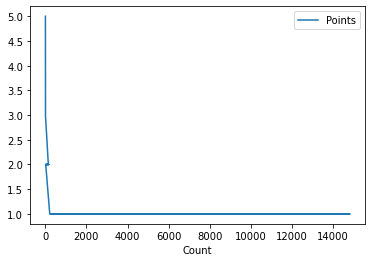

In [54]:
#This line graph shows numerically where the data goes from 5 points down to 1 point.  As you can see, it is extremely quickly due to super rapid growth of the zipcode counts as it progresses 
#from more rural to more urban areas.  

ax = plt.gca()

zipcodeCounts.reset_index(inplace=True, drop = True)
zipcodeCounts = zipcodeCounts.astype(int)

zipcodeCounts.plot(kind='line',x = 'Count', y='Points',ax=ax)

plt.show()

# Analysis/Conclusion:

The nature of the arrest data on its own does not allow me to conclusively decide which neighborhood on its own.  I found that only when the arrest data is combined with the restaurant data and property data with population taken into account (in the end of the Final Report notebook) does it become useful to us in our quest in deciding the best neighborhood.  After we do this, I can conclude that Squirrel Hill is the best neighborhood.  We take a look and see which neighborhoods have the best average property value and restaurants in the area.  This results in a 7 way tie across different neighborhoods.  The crime rates from this dataset and the population of each neighborhood allows me to see which one is best- which is Squirrel Hill in this case.  

If I went back and redid this project, I would have taken into account population density and cross-referenced it with how often different neighborhoods appear in the arrest data to begin with. I saw some of the other groups use it in this manner and their results would much more conclusive even after looking at the dataset on its own.  I originally decided to use the lowest counts of arrest because I thought the points we assigned to the neighborhoods with the lowest number of arrests would better intersect with the points my other group members assigned to their dataset.  Unfortunately, this wasn't really the case so we had to into account population density in combination with the arrest data when we found the best neighborhoods for the other datasets.  

I initially had trouble organizing the arrest data by neighborhood at first.  Some members of the data included the neighborhood, others did not.  This made initial analysis/managing of the dataset very difficult.  My solution to this was pulling the zipcode from each arrestlocation as each arrestlocation had the zipcode as the last element.  I pulled the zipcodes from this element and used this information to compare the neighborhoods.  I recognize that the zipcodes do have overlap but the general trend of crime across different areas is still very useful in determining where the crime occurs in the City of Pittsburgh

In conclusion, Squirrel Hill is the best neighborhood overrall.  Especially with this being such a commonly used dataset across all the groups, I know that there are improvements I could have made specfically to this dataset.  As I mentioned, I could have taken into account population density and severity of crime, as other groups have done.  I am glad, however, that I have seen that it can be done in so many different ways.  This gives me a much greater perspective in the sense that we can all find different results/approaches in attacking the same problem. I feel like in many ways, this is what Computing and Information is all about. With that said, I really enjoyed this assignment and working with my fellow  groupmembers.  Thank you for your time and I hope you have a great summer!! 